In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import gc
import cv2
import os


In [6]:
images1=[]
images2=[]
images3=[]
images4=[]
images5=[]
path_img1="/kaggle/input/mepco-tropic-leaf/MepcoTropicLeaf-V1/Database/Asthma Plant.zip"
path_img2="/kaggle/input/mepco-tropic-leaf/MepcoTropicLeaf-V1/Database/Crown flower.zip"
path_img3="/kaggle/input/mepco-tropic-leaf/MepcoTropicLeaf-V1/Database/Balloon vine.zip"
path_img4="/kaggle/input/mepco-tropic-leaf/MepcoTropicLeaf-V1/Database/Indian Stinging Nettle.zip"
path_img5="/kaggle/input/mepco-tropic-leaf/MepcoTropicLeaf-V1/Database/Ivy Gourd.zip"


In [4]:
len(os.listdir("/kaggle/input/mepco-tropic-leaf/MepcoTropicLeaf-V1/Database/Asthma Plant.zip"))

81

In [17]:
len(os.listdir("/kaggle/input/mepco-tropic-leaf/MepcoTropicLeaf-V1/Database/Crown flower.zip"))

66

In [7]:
df=pd.DataFrame(columns=["img_name","category"])
c=0
for x in os.listdir("/kaggle/input/mepco-tropic-leaf/MepcoTropicLeaf-V1/Database/Asthma Plant.zip"):
    df.loc[c,"img_name"]=x
    df.loc[c,"category"]="Asthma Plant"
    c+=1
    
               

In [8]:
for x in os.listdir("/kaggle/input/mepco-tropic-leaf/MepcoTropicLeaf-V1/Database//Crown flower.zip"):
    df.loc[c,"img_name"]=x
    df.loc[c,"category"]="Crown flower"
    c+=1
    

In [9]:
for x in os.listdir(path_img3):
    df.loc[c,"img_name"]=x
    df.loc[c,"category"]="Balloon vine"
    c+=1
for x in os.listdir(path_img4):
    df.loc[c,"img_name"]=x
    df.loc[c,"category"]="Indian Stinging Nettle"
    c+=1
for x in os.listdir(path_img5):
    df.loc[c,"img_name"]=x
    df.loc[c,"category"]="Ivy Gourd"
    c+=1

In [25]:
df

,img_name,category
0,001_73.jpg,Asthma Plant
1,001_17.jpg,Asthma Plant
2,001_69.jpg,Asthma Plant
3,001_2.jpg,Asthma Plant
4,001_27.jpg,Asthma Plant
...,...,...
142,013_8.jpg,Crown flower
143,013_39.jpg,Crown flower
144,013_26.jpg,Crown flower
145,013_56.jpg,Crown flower


In [10]:
x=df["img_name"]
y=df["category"]

In [8]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# df_train = pd.DataFrame(columns=['image_names','category'])
# df_train["image_names"]=X_train
# df_train["category"]=y_train
# df_val = pd.DataFrame(columns=['image_names','category'])
# df_val["image_names"]=X_test
# df_val["category"]=y_test
# df_train["category"]=df_train["category"].astype(str)
# df_val["category"]=df_val["category"].astype(str)
# df_train.reset_index(drop=True, inplace=True)
# df_val.reset_index(drop=True, inplace=True)

In [14]:
x

0      001_73.jpg
1      001_17.jpg
2      001_69.jpg
3       001_2.jpg
4      001_27.jpg
          ...    
422    022_17.jpg
423    022_36.jpg
424    022_27.jpg
425     022_9.jpg
426    022_44.jpg
Name: img_name, Length: 427, dtype: object

In [11]:
pth="/kaggle/working/"
train_path=os.path.join(pth,'train_img')
os.mkdir(train_path)
ap=os.path.join(pth+r'/train_img','Asthma Plant')
cr=os.path.join(pth+r'/train_img','Crown flower')
bv=os.path.join(pth+r'/train_img','Balloon vine')
sn=os.path.join(pth+r'/train_img','Indian Stinging Nettle')
ig=os.path.join(pth+r'/train_img','Ivy Gourd')

os.mkdir(ap)
os.mkdir(cr)
os.mkdir(bv)
os.mkdir(sn)
os.mkdir(ig)



In [9]:
# val_path=os.path.join(pth,'val')
# os.mkdir(val_path)
# val_as=os.path.join(pth+r'/val','Asthma Plant')
# val_cr=os.path.join(pth+r'/val','Crown flower')
# os.mkdir(val_as)
# os.mkdir(val_cr)

'Ivy Gourd'

In [12]:
import shutil

for i in range(len(x)):
    img=x.iloc[i,]
    b=y.iloc[i,]
    
    if(b=='Asthma Plant'):
        shutil.copy2(path_img1+'/'+img,ap)

    elif(b=='Crown flower'):
        shutil.copy2(path_img2+'/'+img,cr)

    elif(b=='Balloon vine'):
        shutil.copy2(path_img3+'/'+img,bv)

    elif(b=='Indian Stinging Nettle'):
        shutil.copy2(path_img4+'/'+img,sn)
    else:
         shutil.copy2(path_img5+'/'+img,ig)
        
    
   

In [13]:
import tensorflow as tf
#from tensorflow.python.keras.applications import ResNet50
#from tensorflow.keras.applications import ResNet50
from keras.models import Model, load_model, Sequential
from keras.layers import Input, BatchNormalization, Activation, Dense, Dropout, Flatten
from keras.layers.core import Lambda, RepeatVector, Reshape
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D, GlobalMaxPool2D,GlobalAveragePooling2D,MaxPool2D

from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam,SGD
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array,array_to_img, img_to_array, load_img

In [14]:

datagen=ImageDataGenerator(rescale=1./255,rotation_range=20,
        zoom_range=0.15,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.15,
        horizontal_flip=True,
        fill_mode="nearest", validation_split=0.3
                          )



In [15]:
train_generator=datagen.flow_from_directory(directory="/kaggle/working/train_img",class_mode='categorical', target_size=(224,224), batch_size=32,shuffle='True',subset="training")
val_gen=datagen.flow_from_directory(directory="/kaggle/working/train_img",class_mode='categorical', target_size=(224,224), batch_size=16,subset='validation')

Found 302 images belonging to 5 classes.
Found 125 images belonging to 5 classes.


In [121]:
# img = load_img('/kaggle/input/mepco-tropic-leaf/MepcoTropicLeaf-V1/Database/Asthma Plant.zip/001_0.jpg')  
# x = img_to_array(img) 
# x = x.reshape((1,) + x.shape) 

In [123]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread, imshow, subplots, show

In [ ]:
img=cv2.imread("/kaggle/working/train_img/Balloon vine/003_62.jpg")
img = cv2.resize(img,(224, 224))  # Resize to match the input size of your model
img = np.array(img)  # Convert to numpy array
img = img / 255.0 

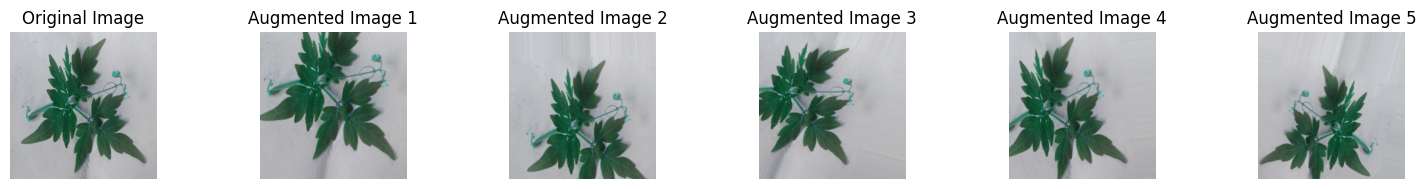

In [135]:
augmented_images = []
num_augmentations = 5  # Number of augmented images to generate

for _ in range(num_augmentations):
    augmented_img = datagen.random_transform(img,seed=None)
    augmented_images.append(augmented_img)

# Plot the original and augmented images
plt.figure(figsize=(18, 6))
plt.subplots_adjust(wspace=0.7)
plt.subplot(1, num_augmentations + 1, 1)
plt.title("Original Image")
plt.imshow(img)
plt.axis('off')

 

for i, augmented_img in enumerate(augmented_images):
    plt.subplot(1, num_augmentations + 1, i + 2)
    plt.title(f"Augmented Image {i + 1}")
    plt.imshow(augmented_img)
    plt.axis('off')

plt.savefig('augmented_images.jpg', bbox_inches='tight', dpi=300, format='jpeg')
plt.show()








In [ ]:
height, width, depth=224,224,3

In [ ]:
model = Sequential()
inputShape = (height, width, depth)
chanDim = -1

model.add(Conv2D(32, (3, 3), padding="same",input_shape=inputShape))
model.add(Activation("relu"))
# model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(3, 3)))
#model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
# model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
# model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
# model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
# model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
# model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(5))
model.add(Activation("softmax"))

In [21]:
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=["accuracy"])

In [14]:
callback=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=5,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
   
)

In [17]:
tf.config.run_functions_eagerly(True)

In [22]:
history=model.fit(train_generator,epochs=20,validation_data=val_gen,callbacks=[callback])


Epoch 1/20
10/10 [==============================] - 37s 3s/step - loss: 1.7363 - accuracy: 0.3510 - val_loss: 1.2484 - val_accuracy: 0.4880
Epoch 2/20
10/10 [==============================] - 34s 3s/step - loss: 1.1094 - accuracy: 0.4967 - val_loss: 1.1083 - val_accuracy: 0.4000
Epoch 3/20
10/10 [==============================] - 35s 3s/step - loss: 1.0701 - accuracy: 0.5033 - val_loss: 1.0156 - val_accuracy: 0.4320
Epoch 4/20
10/10 [==============================] - 34s 3s/step - loss: 0.8909 - accuracy: 0.6192 - val_loss: 0.8335 - val_accuracy: 0.5920
Epoch 5/20
10/10 [==============================] - 34s 3s/step - loss: 0.6319 - accuracy: 0.7483 - val_loss: 0.7036 - val_accuracy: 0.6480
Epoch 6/20
10/10 [==============================] - 34s 3s/step - loss: 0.5027 - accuracy: 0.8046 - val_loss: 0.5974 - val_accuracy: 0.7760
Epoch 7/20
10/10 [==============================] - 35s 3s/step - loss: 0.5440 - accuracy: 0.7715 - val_loss: 0.7660 - val_accuracy: 0.6400
Epoch 8/20
10/10 [==

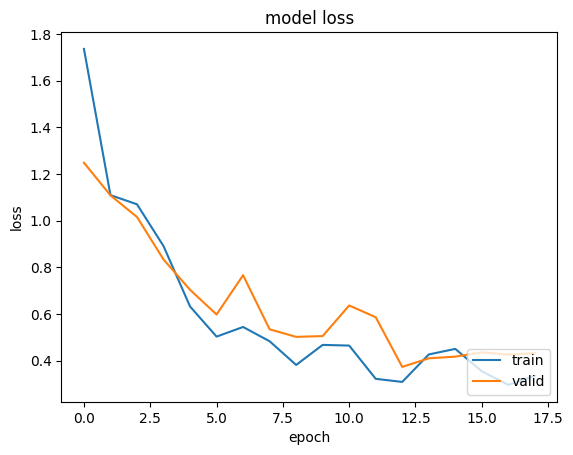

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')

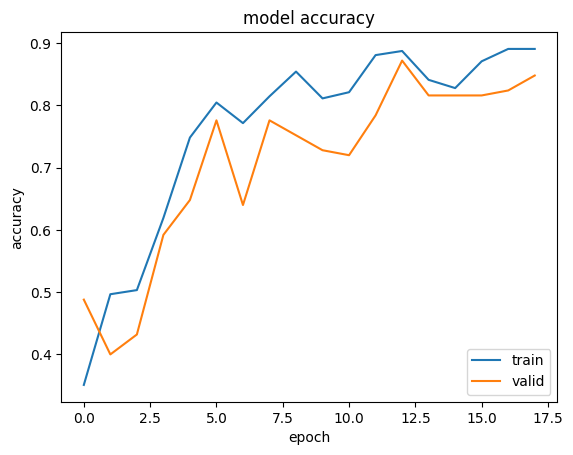

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')

In [25]:
model.save("/kaggle/working/model.h5")

In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 activation_7 (Activation)   (None, 224, 224, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 74, 74, 64)        18496     
                                                                 
 activation_8 (Activation)   (None, 74, 74, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 74, 74, 64)        36928     
                                                      

In [58]:
len(val_gen[0][0])

16

In [17]:
import pickle 

In [36]:

#Save the model to file in the current working directory
pickle_file_name = "my_model.pkl"  

with open(pickle_file_name, 'wb') as file:  
    pickle.dump(model, file)

In [18]:
with open("/kaggle/input/model/my_model.pkl", 'rb') as file:  
    pk_model = pickle.load(file)
y_predict = pk_model.predict(val_gen[0][0])

1/1 [==============================] - 1s 622ms/step


In [60]:
y_predict

array([[2.15098382e-07, 1.81810453e-03, 8.88450742e-01, 1.09730735e-01,
        1.84292972e-07],
       [1.22708343e-06, 1.59583633e-05, 4.28382281e-18, 1.03431619e-12,
        9.99982774e-01],
       [2.21739720e-05, 9.99396920e-01, 8.94521124e-10, 4.47236991e-04,
        1.33555004e-04],
       [6.11938944e-10, 9.99482453e-01, 3.00151797e-08, 5.17200329e-04,
        1.98291289e-07],
       [9.78528500e-01, 2.10018139e-02, 1.28360356e-09, 3.30416492e-06,
        4.66318103e-04],
       [2.64151752e-01, 7.91997686e-02, 2.85989363e-02, 6.27743006e-01,
        3.06515431e-04],
       [9.86114025e-01, 7.20376987e-03, 4.84065026e-07, 1.07218810e-04,
        6.57444401e-03],
       [1.39834458e-06, 4.35461178e-02, 4.14027542e-01, 5.42419791e-01,
        5.08737776e-06],
       [2.51571164e-02, 8.52760255e-01, 4.81310236e-09, 7.36867369e-05,
        1.22008942e-01],
       [9.43772018e-01, 5.23221605e-02, 9.97958409e-07, 6.93921873e-04,
        3.21081886e-03],
       [6.44314685e-04, 9.7579

In [19]:
y_predict1=np.argmax(y_predict,axis=1)

In [20]:
y_predict1

array([2, 1, 0, 1, 2, 3, 1, 0, 0, 1, 4, 3, 0, 3, 1, 2])

In [86]:
from tensorflow.keras.utils import to_categorical

# Assuming `predicted_classes` contains the predicted class indices


# Convert predicted class indices to one-hot encoded vectors
one_hot_encoded = to_categorical(y_predict1, num_classes=5)

In [87]:
(one_hot_encoded)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

In [61]:
y_truth=val_gen[0][1]

In [66]:
(y_truth)

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [83]:
model.evaluate(val_gen)

8/8 [==============================] - 5s 606ms/step - loss: 0.4310 - accuracy: 0.8720


[0.4309639632701874, 0.871999979019165]

In [88]:
pk_model.evaluate(val_gen)

8/8 [==============================] - 5s 549ms/step - loss: 0.4239 - accuracy: 0.8800


[0.4238811731338501, 0.8799999952316284]

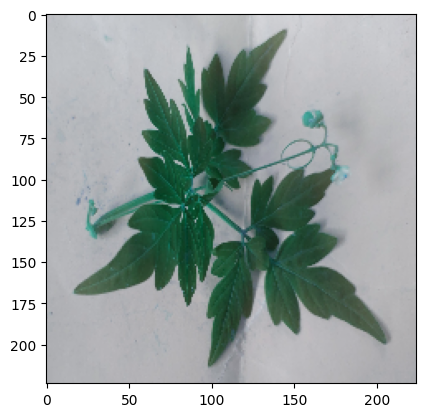

In [102]:
plt.imshow(img)

In [101]:
img

array([[[0.74901961, 0.76078431, 0.77647059],
        [0.75686275, 0.76470588, 0.77647059],
        [0.74117647, 0.74509804, 0.76078431],
        ...,
        [0.78823529, 0.78431373, 0.8       ],
        [0.78823529, 0.78823529, 0.80392157],
        [0.79607843, 0.79215686, 0.80392157]],

       [[0.74901961, 0.75294118, 0.76862745],
        [0.75294118, 0.75686275, 0.77254902],
        [0.75686275, 0.76078431, 0.77647059],
        ...,
        [0.79215686, 0.78823529, 0.80392157],
        [0.79215686, 0.78823529, 0.80392157],
        [0.79607843, 0.79215686, 0.80784314]],

       [[0.75686275, 0.76078431, 0.77647059],
        [0.74901961, 0.74901961, 0.77254902],
        [0.75294118, 0.75686275, 0.77254902],
        ...,
        [0.77254902, 0.77647059, 0.79215686],
        [0.78431373, 0.78039216, 0.79607843],
        [0.8       , 0.8       , 0.81176471]],

       ...,

       [[0.67843137, 0.68235294, 0.69803922],
        [0.68235294, 0.68627451, 0.70196078],
        [0.67843137, 0

In [22]:
image_data_generator = ImageDataGenerator()
image_generator = image_data_generator.flow(np.expand_dims(img, axis=0), batch_size=1)

In [23]:

predict=pk_model.predict(image_generator)

1/1 [==============================] - 0s 184ms/step


In [24]:
predict

array([[2.4163573e-12, 9.8614675e-01, 4.1298889e-09, 1.3853273e-02,
        7.5364370e-10]], dtype=float32)

In [119]:
val_gen.class_indices

{'Asthma Plant': 0,
 'Balloon vine': 1,
 'Crown flower': 2,
 'Indian Stinging Nettle': 3,
 'Ivy Gourd': 4}

In [120]:
train_generator.class_indices

{'Asthma Plant': 0,
 'Balloon vine': 1,
 'Crown flower': 2,
 'Indian Stinging Nettle': 3,
 'Ivy Gourd': 4}

In [25]:
np.argmax(predict,axis=1)

array([1])